# Music Genre Prediction
## Machine Learning Assignment - MANILI

The project consists in a classification problem of a specific music genre given provided music features.
The dataset is taken from this Kaggle repository - https://www.kaggle.com/insiyeah/musicfeatures which provided the following description: "the dataset provided here which consists of 1000 audio tracks each 30 seconds long. It contains 10 genres, each represented by 100 tracks. The tracks are all 22050Hz Mono 16-bit audio files in .wav format."
The audio features were extracted via a python library called librosa utilising the code present at this link https://librosa.org/doc/latest/index.html.
After trying different Classification algorithms and evaluating their performance, a sample of new songs, with features extrapolated via the same code and library, will be submitted to the machine learning best performing algorithm, to assign a "genre" to my music of interest. 

### Project overview
The assignment is divided into steps:
- data exploration and preparation
- I algorithm: Support Vector Classifier
- II algorithm: Nearest Neighbor
- III algorithm: Decision Tree
- IV algorithm: Ensamble Methods (Random Forest / Extra Trees plus Boosting)
- Analysis results and findings
- Extraction of music features from selected music
- Prediction of extra music

### Problem statement
Music genres are established conventions, but probably they might be distiguish-able via some music features. Indeed, as genres are many, and very often they are overlapping, it is expected to encounter some challenges to have high prediction performances.
The project has been also conducted only exclusively on two better differentiated genres (pop and classical), and the performance as expected were much higher.

In [1]:
## import the necessary libraries
import os

## Data management
import pandas as pd

## Math and Stat modules
import numpy as np
from scipy import stats

## Visualization
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
## import and explore the dataset
raw_data = pd.read_csv('datasets/data.csv')
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [3]:
raw_data.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [4]:
raw_data['label'].value_counts()

jazz         100
blues        100
disco        100
classical    100
pop          100
reggae       100
metal        100
hiphop       100
country      100
rock         100
Name: label, dtype: int64

In [5]:
## drop unnecessary columns
raw_data = raw_data.drop(columns = 'filename')

In [6]:
raw_data.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


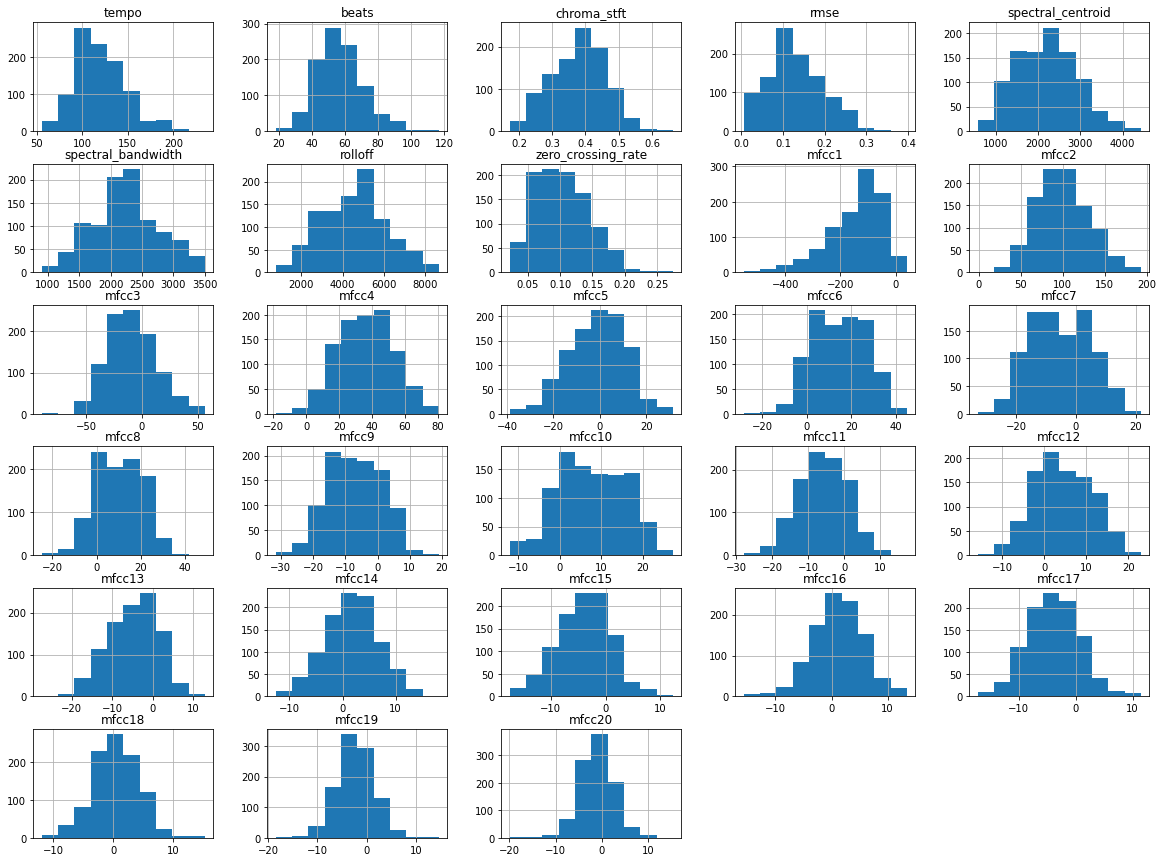

In [7]:
## explore features distribution
raw_data.hist(figsize = (20,15))
plt.show()

The features distribution seems somehow Normal Standard. This will help in identifying the scaler needed to run the algorithms. Most of the times will the StandardScaler() with the exception of the MinMaxScaler() in case of kNN algorithm, due to its better performances with this type of scaling.

<AxesSubplot:>

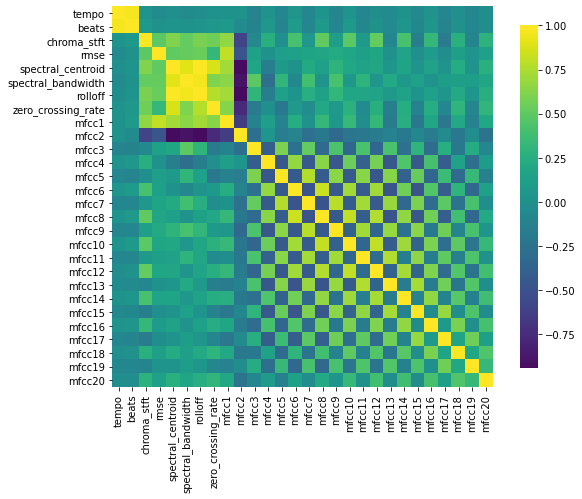

In [8]:
## exploring features correlations
corr_raw = raw_data.corr()
mask = np.triu(np.ones_like(corr_raw, dtype=bool))
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_raw, cmap = "viridis", vmax = 1, center=0,
            square=True, cbar_kws={"shrink": .90})

It seems some of the features are correlated and we might want to dig more in the correlation and eventually drop them to help the performance of some classifiers, sensible to correlations.

In [9]:
max = corr_raw[corr_raw != 1.0].max()
max.sort_values(ascending = False)

spectral_centroid     0.979633
rolloff               0.979633
tempo                 0.966179
beats                 0.966179
spectral_bandwidth    0.956194
zero_crossing_rate    0.874755
mfcc6                 0.837294
mfcc8                 0.837294
mfcc10                0.811826
mfcc12                0.808013
rmse                  0.807260
mfcc1                 0.807260
mfcc9                 0.787006
mfcc7                 0.787006
mfcc5                 0.766312
mfcc11                0.761336
mfcc13                0.761336
mfcc14                0.734650
mfcc15                0.733808
mfcc17                0.675224
mfcc4                 0.673556
mfcc16                0.659951
chroma_stft           0.659294
mfcc3                 0.601300
mfcc18                0.593795
mfcc19                0.554918
mfcc20                0.448973
mfcc2                 0.049740
dtype: float64

In [10]:
min = corr_raw[corr_raw != -1.0].min()
min.sort_values(ascending = True)

spectral_centroid    -0.940171
mfcc2                -0.940171
rolloff              -0.934305
spectral_bandwidth   -0.896660
zero_crossing_rate   -0.760127
mfcc1                -0.638911
chroma_stft          -0.598495
mfcc8                -0.487295
mfcc7                -0.487295
rmse                 -0.483765
mfcc6                -0.482113
mfcc15               -0.479754
mfcc13               -0.476718
mfcc12               -0.460168
mfcc5                -0.460168
mfcc4                -0.459186
mfcc9                -0.451078
mfcc10               -0.446333
mfcc11               -0.427880
mfcc3                -0.409602
mfcc17               -0.405826
mfcc14               -0.375353
mfcc16               -0.340977
mfcc19               -0.329563
mfcc18               -0.304606
mfcc20               -0.238651
beats                -0.099869
tempo                -0.097491
dtype: float64

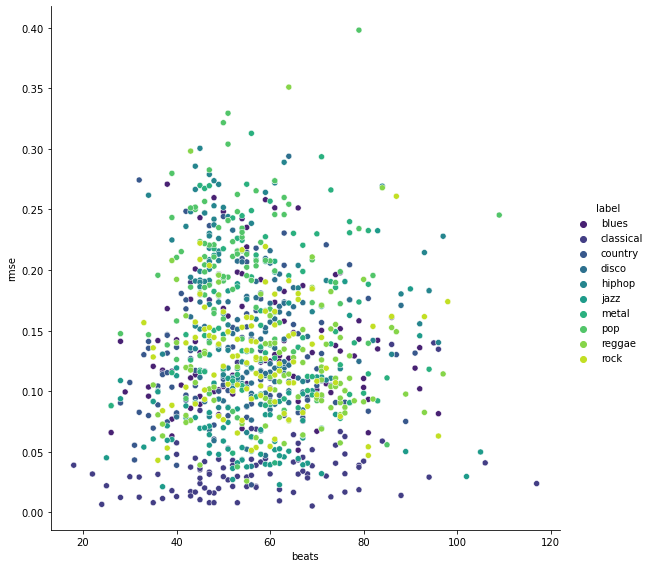

In [12]:
## example of plot
sns.pairplot(raw_data, hue="label", x_vars="beats", y_vars="rmse", height = 8, palette="viridis")
plt.savefig('plots/example.png')

In [13]:
subset1 = raw_data[['tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid',
       'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'label']]
subset2 = raw_data[['mfcc1', 'mfcc2',
       'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10',
       'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17',
       'mfcc18', 'mfcc19', 'mfcc20', 'label']]

In [ ]:
g = sns.pairplot(raw_data, hue="label", palette="husl")

In [ ]:
g1 = sns.pairplot(subset1, hue="label", palette="husl")

In [ ]:
g2 = sns.pairplot(subset2, hue="label", palette="husl")

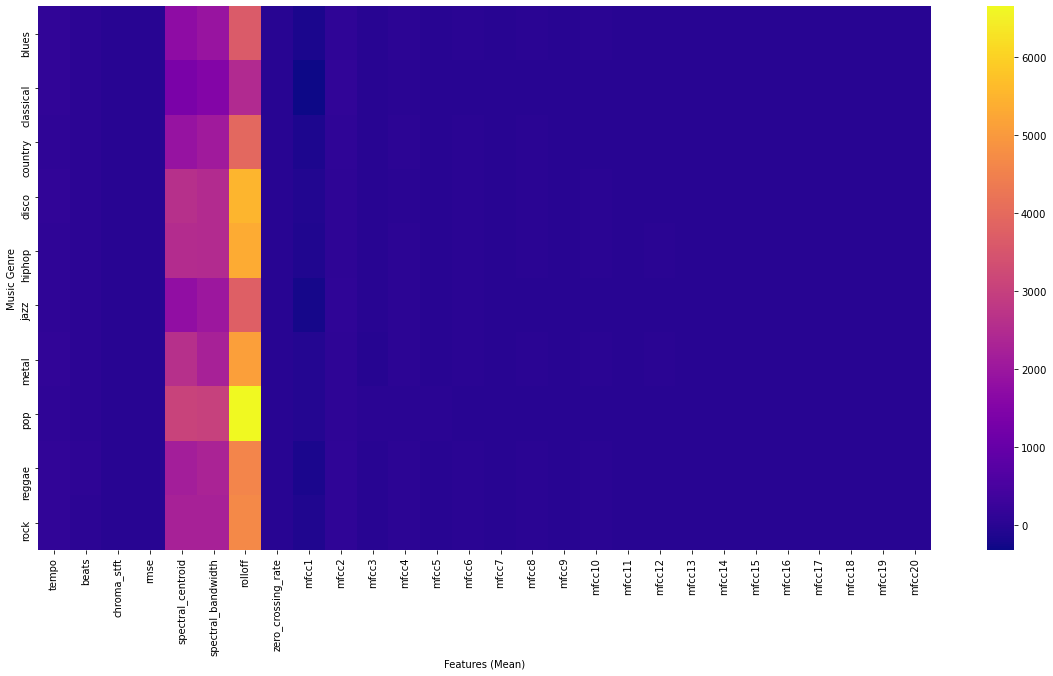

In [14]:
genre = raw_data
columns = genre.groupby(['label']).mean().columns
labels = genre.label.unique()
fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(genre.groupby(['label']).mean().iloc[:,0:80], cmap = 'plasma', yticklabels=labels)
plt.ylabel("Music Genre")
plt.xlabel("Features (Mean)")
plt.show()

In [15]:
## save raw data in the environment for algoritm not sensible to correlation
%store raw_data

Stored 'raw_data' (DataFrame)


These features seems to be highly correlated..
...positively
- spectral_centroid     0.979633
- rolloff               0.979633
- tempo                 0.966179
- beats                 0.966179
- spectral_bandwidth    0.956194
- zero_crossing_rate    0.874755
- mfcc6                 0.837294
- mfcc8                 0.837294
...and negatively.
- spectral_centroid    -0.940171
- mfcc2                -0.940171
- rolloff              -0.934305
- spectral_bandwidth   -0.896660

'tempo','spectral_centroid','mfcc2','mfcc8' were dropped in the "uncorrelated" version of the dataset.

In [16]:
## drop corr variables
raw_data_uncorr = raw_data.drop(columns = ['tempo','spectral_centroid','mfcc2','mfcc8'])

<AxesSubplot:>

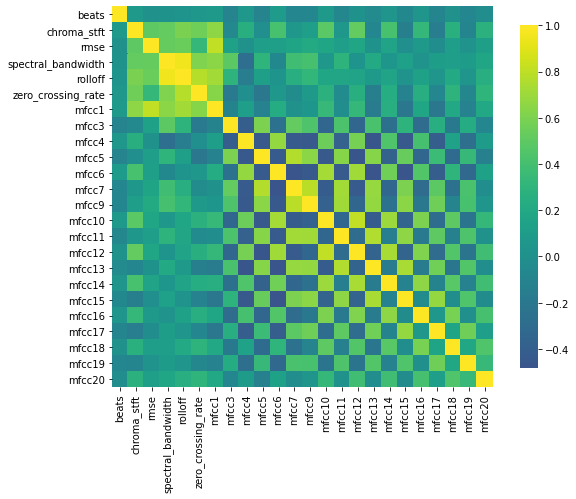

In [17]:
corr_raw1 = raw_data_uncorr.corr()
mask = np.triu(np.ones_like(corr_raw1, dtype=bool))
f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(corr_raw1, cmap = "viridis", vmax = 1, center=0,
            square=True, cbar_kws={"shrink": .90})

In [18]:
## save raw data in the environment for algoritm
%store raw_data_uncorr 

Stored 'raw_data_uncorr' (DataFrame)
